In [4]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

infile = open('../Data/MAPK14_mut_cutoff_2/rmsds.pkl','rb')
mut_rmsd_set = pickle.load(infile)
infile.close()

mut_rmsd_set = mut_rmsd_set['MAPK14']

infile = open('../Data/MAPK14_mut_cutoff_4/rmsds.pkl','rb')
mut4_rmsd_set = pickle.load(infile)
infile.close()
mut4_rmsd_set = mut4_rmsd_set['MAPK14']

infile = open('../Data/MAPK14_mut_conflict/rmsds.pkl','rb')
mut_conflict_rmsd_set = pickle.load(infile)
infile.close()
mut_conflict_rmsd_set = mut_conflict_rmsd_set['MAPK14']

infile = open('../Data/MAPK14_mut_pred/rmsds.pkl','rb')
mut_pred_rmsd_set = pickle.load(infile)
infile.close()
mut_pred_rmsd_set = mut_pred_rmsd_set['MAPK14']

infile = open('../../docking/Data/rmsds.pkl','rb')
reg_rmsd_set = pickle.load(infile)
infile.close()

reg_rmsd_set = reg_rmsd_set['MAPK14']

mut4 3GCP 1KV1
mut_conflict 3GCP 3HUC
mut4 3GCP 3O8P
mut_conflict 3GCP 3D7Z
mut_conflict 3GCP 2BAK
mut 3GCP 4F9W
mut4 3GCP 2BAJ
mut 3GCP 3GCS
mut_conflict 3GCP 3HL7
mut4 3GCP 2ZB1
reg 3GCP 3IPH
mut4 3GCP 2BAL
mut 3GCP 3IW5
reg 3GCP 3E92


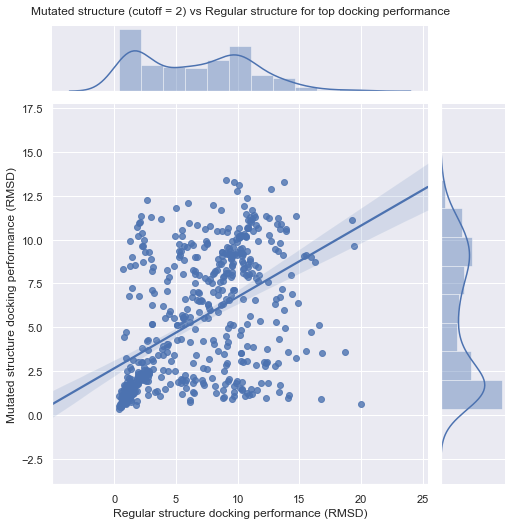

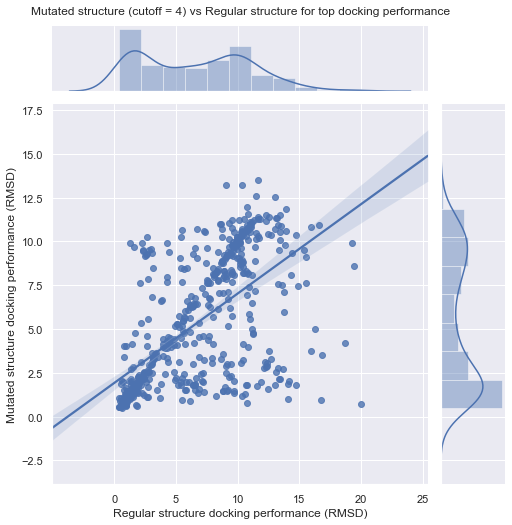

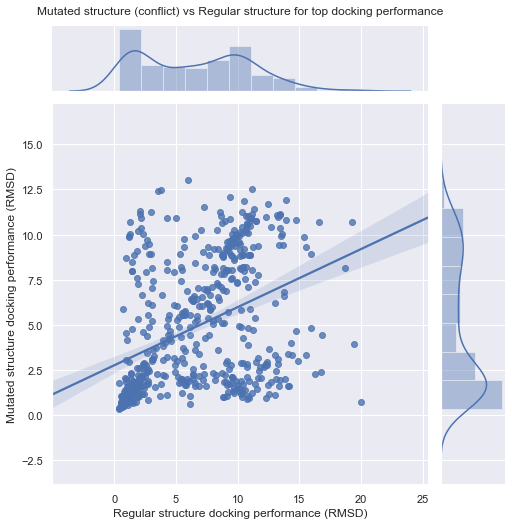

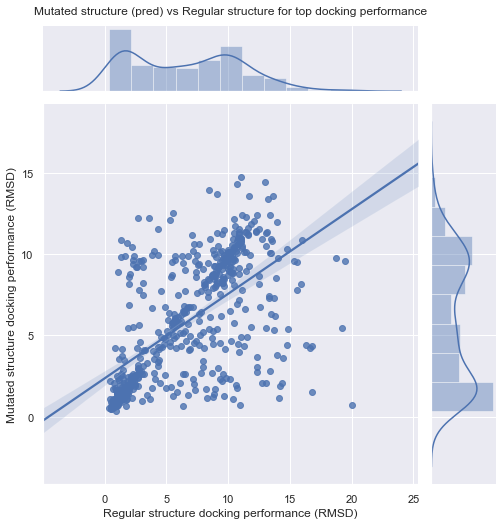

In [8]:
top_mut_ls = []
top_mut4_ls = []
top_mut_conflict_ls = []
top_mut_pred_ls = []
top_reg_ls = []
for start in mut_rmsd_set:
    for target in mut_rmsd_set[start]:
        if start != target and start != '4DLI' and target != '4DLI':
            #print(start, target)
            if len(mut_rmsd_set[start][target]) == 0:
                print('mut', target, start)
                continue
                
            if len(reg_rmsd_set[start][target]) == 0:
                print('reg', target, start)
                continue
            
            if len(mut4_rmsd_set[start][target]) == 0:
                print('mut4', target, start)
                continue
            
            if len(mut_conflict_rmsd_set[start][target]) == 0:
                print('mut_conflict', target, start)
                continue
                
            if len(mut_pred_rmsd_set[start][target]) == 0:
                print('mut_pred', target, start)
                continue
                
            #if reg_rmsd_set[start][target][0] > 2:
            top_mut_ls.append(mut_rmsd_set[start][target][0])
            top_mut4_ls.append(mut4_rmsd_set[start][target][0])
            top_mut_conflict_ls.append(mut_conflict_rmsd_set[start][target][0])
            top_mut_pred_ls.append(mut_pred_rmsd_set[start][target][0])
            top_reg_ls.append(reg_rmsd_set[start][target][0])
    
    
sns.set(style="darkgrid")
g = sns.jointplot(top_reg_ls, top_mut_ls, kind="reg", height=7)
plt.title('Mutated structure (cutoff = 2) vs Regular structure for top docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')
g = sns.jointplot(top_reg_ls, top_mut4_ls, kind="reg", height=7)
plt.title('Mutated structure (cutoff = 4) vs Regular structure for top docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')
g = sns.jointplot(top_reg_ls, top_mut_conflict_ls, kind="reg", height=7)
plt.title('Mutated structure (conflict) vs Regular structure for top docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')
g = sns.jointplot(top_reg_ls, top_mut_pred_ls, kind="reg", height=7)
plt.title('Mutated structure (pred) vs Regular structure for top docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')
plt.show()


In [9]:
print("Top Glide Pose")

print("Regular avg", statistics.mean(top_reg_ls))
print("Mutated (cutoff = 2) avg", statistics.mean(top_mut_ls))
print("Mutated (cutoff = 4) avg", statistics.mean(top_mut4_ls))
print("Mutated (conflict) avg", statistics.mean(top_mut_conflict_ls))
print("Mutated (pred) avg", statistics.mean(top_mut_pred_ls))
print()

top_reg_ls_accuracy = [x < 2 for x in top_reg_ls]
print("Regular accuracy", sum(top_reg_ls_accuracy) * 100 / len(top_reg_ls_accuracy))
top_mut_ls_accuracy = [x < 2 for x in top_mut_ls]
print("Mutated (cutoff = 2) accuracy", sum(top_mut_ls_accuracy) * 100 / len(top_mut_ls_accuracy))
top_mut4_ls_accuracy = [x < 2 for x in top_mut4_ls]
print("Mutated (cutoff = 4) accuracy", sum(top_mut4_ls_accuracy) * 100 / len(top_mut4_ls_accuracy))
top_mut_conflict_ls_accuracy = [x < 2 for x in top_mut_conflict_ls]
print("Mutated (conflict) accuracy", sum(top_mut_conflict_ls_accuracy) * 100 / len(top_mut_conflict_ls_accuracy))
top_mut_pred_ls_accuracy = [x < 2 for x in top_mut_pred_ls]
print("Mutated (pred) accuracy", sum(top_mut_pred_ls_accuracy) * 100 / len(top_mut_pred_ls_accuracy))
print()

improvement = [top_mut_ls[i] < top_reg_ls[i] for i in range(len(top_mut_ls))]
print("Improvement (cutoff = 2) percentage", sum(improvement) * 100 / len(improvement))
improvement = [top_mut4_ls[i] < top_reg_ls[i] for i in range(len(top_mut4_ls))]
print("Improvement (cutoff = 4) percentage", sum(improvement) * 100 / len(improvement))
improvement = [top_mut_conflict_ls[i] < top_reg_ls[i] for i in range(len(top_mut_conflict_ls))]
print("Improvement (conflict) percentage", sum(improvement) * 100 / len(improvement))
improvement = [top_mut_pred_ls[i] < top_reg_ls[i] for i in range(len(top_mut_pred_ls))]
print("Improvement (pred) percentage", sum(improvement) * 100 / len(improvement))

Top Glide Pose
Regular avg 6.594749018125797
Mutated (cutoff = 2) avg 5.342745057030257
Mutated (cutoff = 4) avg 5.278970448360738
Mutated (conflict) avg 4.884563467570511
Mutated (pred) avg 5.795508875101727

Regular accuracy 23.977695167286246
Mutated (cutoff = 2) accuracy 29.739776951672862
Mutated (cutoff = 4) accuracy 30.297397769516728
Mutated (conflict) accuracy 32.899628252788105
Mutated (pred) accuracy 24.53531598513011

Improvement (cutoff = 2) percentage 61.89591078066915
Improvement (cutoff = 4) percentage 62.45353159851301
Improvement (conflict) percentage 65.61338289962825
Improvement (pred) percentage 57.43494423791822


mut4 3GCP 1KV1
mut_conflict 3GCP 3HUC
mut4 3GCP 3O8P
mut_conflict 3GCP 3D7Z
mut_conflict 3GCP 2BAK
mut 3GCP 4F9W
mut4 3GCP 2BAJ
mut 3GCP 3GCS
mut_conflict 3GCP 3HL7
mut4 3GCP 2ZB1
mut4 3GCP 3IPH
mut4 3GCP 2BAL
mut 3GCP 3IW5
reg 3GCP 3E92


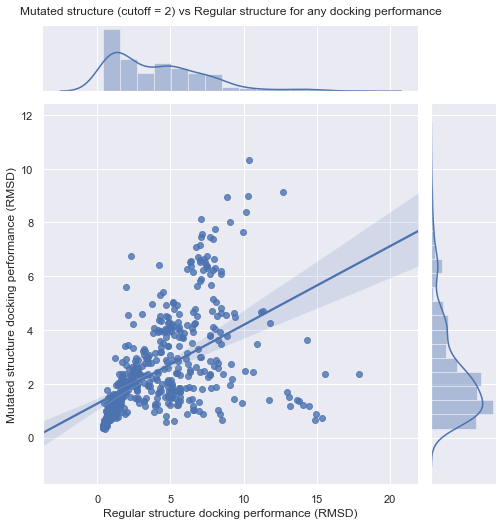

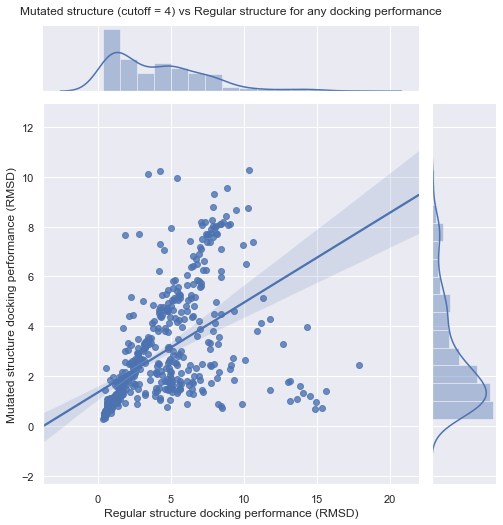

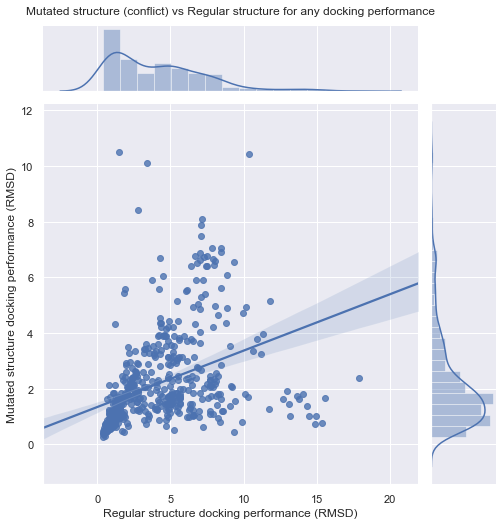

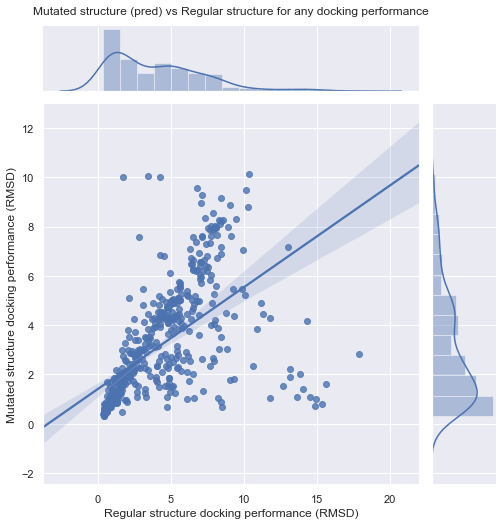

In [10]:
any_mut_ls = []
any_mut4_ls = []
any_mut_conflict_ls = []
any_mut_pred_ls = []
any_reg_ls = []
for start in mut_rmsd_set:
    for target in mut_rmsd_set[target]:
        if start != target and start != '4DLI' and target != '4DLI':
            #print(start, target)
            if len(mut_rmsd_set[start][target]) == 0:
                print('mut', target, start)
                continue
                
            if len(mut4_rmsd_set[start][target]) == 0:
                print('mut4', target, start)
                continue
                
            if len(mut_conflict_rmsd_set[start][target]) == 0:
                print('mut_conflict', target, start)
                continue
                
            if len(mut_pred_rmsd_set[start][target]) == 0:
                print('mut_pred', target, start)
                continue
                
            if len(reg_rmsd_set[start][target]) == 0:
                print('reg', target, start)
                continue
                
            #if reg_rmsd_set[start][target][0] > 2:
            any_mut_ls.append(min(mut_rmsd_set[start][target]))
            any_mut4_ls.append(min(mut4_rmsd_set[start][target]))
            any_mut_conflict_ls.append(min(mut_conflict_rmsd_set[start][target]))
            any_mut_pred_ls.append(min(mut_pred_rmsd_set[start][target]))
            any_reg_ls.append(min(reg_rmsd_set[start][target]))
    
    
sns.set(style="darkgrid")
g = sns.jointplot(any_reg_ls, any_mut_ls, kind="reg", height=7)
plt.title('Mutated structure (cutoff = 2) vs Regular structure for any docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')

g = sns.jointplot(any_reg_ls, any_mut4_ls, kind="reg", height=7)
plt.title('Mutated structure (cutoff = 4) vs Regular structure for any docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')

g = sns.jointplot(any_reg_ls, any_mut_conflict_ls, kind="reg", height=7)
plt.title('Mutated structure (conflict) vs Regular structure for any docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')

g = sns.jointplot(any_reg_ls, any_mut_pred_ls, kind="reg", height=7)
plt.title('Mutated structure (pred) vs Regular structure for any docking performance', pad=90)
plt.xlabel('Regular structure docking performance (RMSD)')
plt.ylabel('Mutated structure docking performance (RMSD)')
plt.show()

In [12]:
print("Any Glide Pose")
print("Regular avg", statistics.mean(any_reg_ls))
print("Mutated (cutoff = 2) avg", statistics.mean(any_mut_ls))
print("Mutated (cutoff = 4) avg", statistics.mean(any_mut4_ls))
print("Mutated (conflict) avg", statistics.mean(any_mut_conflict_ls))
print("Mutated (pred) avg", statistics.mean(any_mut_pred_ls))
print()
any_reg_ls_accuracy = [x < 2.5 for x in any_reg_ls]
print("Regular accuracy", sum(any_reg_ls_accuracy) * 100 / len(any_reg_ls_accuracy))
improvement = [any_mut_ls[i] < any_reg_ls[i] for i in range(len(any_mut_ls))]
any_mut_ls_accuracy = [x < 2.5 for x in any_mut_ls]
print("Mutated (cutoff = 2) accuracy", sum(any_mut_ls_accuracy) * 100 / len(any_mut_ls_accuracy))
any_mut4_ls_accuracy = [x < 2.5 for x in any_mut4_ls]
print("Mutated (cutoff = 4) accuracy", sum(any_mut4_ls_accuracy) * 100 / len(any_mut4_ls_accuracy))
any_mut_conflict_ls_accuracy = [x < 2.5 for x in any_mut_conflict_ls]
print("Mutated (conflict) accuracy", sum(any_mut_conflict_ls_accuracy) * 100 / len(any_mut_conflict_ls_accuracy))
any_mut_pred_ls_accuracy = [x < 2.5 for x in any_mut_pred_ls]
print("Mutated (pred) accuracy", sum(any_mut_pred_ls_accuracy) * 100 / len(any_mut_pred_ls_accuracy))
print()
print("Improvement (cutoff = 2) percentage", sum(improvement) * 100 / len(improvement))
improvement = [any_mut4_ls[i] < any_reg_ls[i] for i in range(len(any_mut4_ls))]
print("Improvement (cutoff = 4) percentage", sum(improvement) * 100 / len(improvement))
improvement = [any_mut_conflict_ls[i] < any_reg_ls[i] for i in range(len(any_mut_conflict_ls))]
print("Improvement (conflict) percentage", sum(improvement) * 100 / len(improvement))
improvement = [any_mut_pred_ls[i] < any_reg_ls[i] for i in range(len(any_mut_pred_ls))]
print("Improvement (pred) percentage", sum(improvement) * 100 / len(improvement))

Any Glide Pose
Regular avg 4.091954313449651
Mutated (cutoff = 2) avg 2.460224908513041
Mutated (cutoff = 4) avg 2.8157430092868365
Mutated (conflict) avg 2.167959999060247
Mutated (pred) avg 3.093566857996934

Regular accuracy 41.24513618677043
Mutated (cutoff = 2) accuracy 65.36964980544747
Mutated (cutoff = 4) accuracy 59.92217898832685
Mutated (conflict) accuracy 73.34630350194553
Mutated (pred) accuracy 50.778210116731515

Improvement (cutoff = 2) percentage 74.12451361867704
Improvement (cutoff = 4) percentage 70.42801556420234
Improvement (conflict) percentage 79.37743190661479
Improvement (pred) percentage 65.36964980544747


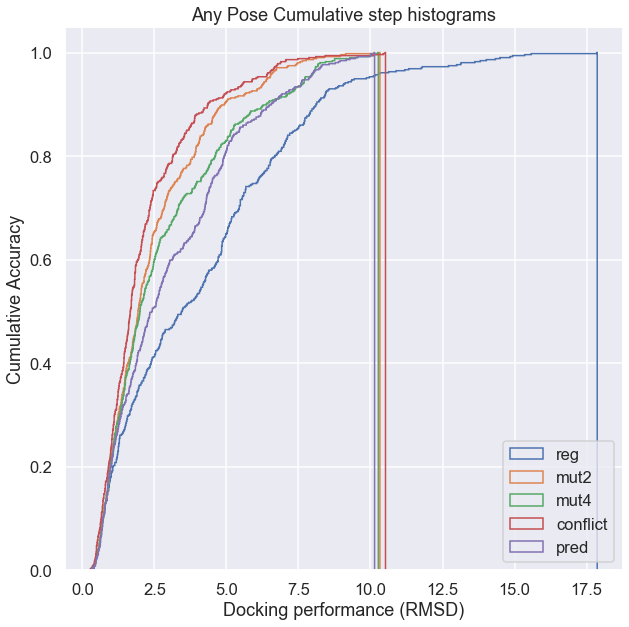

In [21]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 1000

sns.set_context("talk", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 10))

# plot the cumulative histogram
n, bins, patches = ax.hist(any_reg_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='reg')
n, bins, patches = ax.hist(any_mut_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='mut2')
n, bins, patches = ax.hist(any_mut4_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='mut4')
n, bins, patches = ax.hist(any_mut_conflict_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='conflict')
n, bins, patches = ax.hist(any_mut_pred_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='pred')
ax.grid(True)
ax.legend(loc='lower right')
ax.set_title('Any Pose Cumulative step histograms')
ax.set_xlabel('Docking performance (RMSD)')
ax.set_ylabel('Cumulative Accuracy')

plt.show()

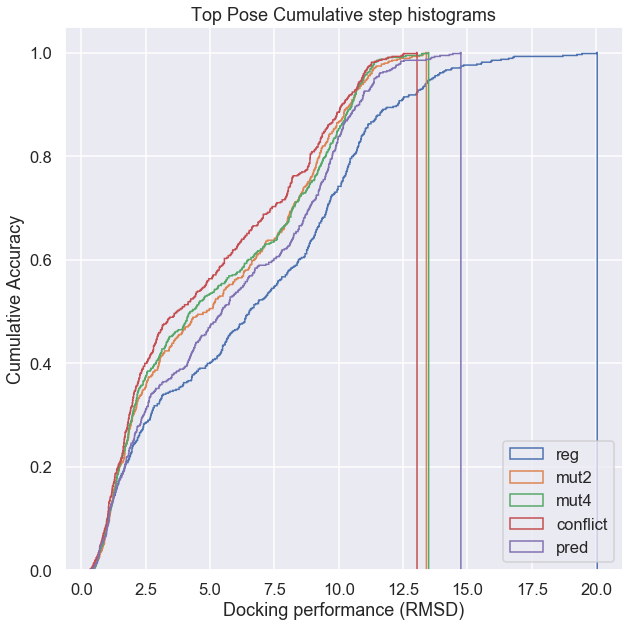

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 1000

sns.set_context("talk", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 10))

# plot the cumulative histogram
n, bins, patches = ax.hist(top_reg_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='reg')
n, bins, patches = ax.hist(top_mut_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='mut2')
n, bins, patches = ax.hist(top_mut4_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='mut4')
n, bins, patches = ax.hist(top_mut_conflict_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='conflict')
n, bins, patches = ax.hist(top_mut_pred_ls, n_bins, density=True, histtype='step',
                           cumulative=True, label='pred')

ax.grid(True)
ax.legend(loc='lower right')
ax.set_title('Top Pose Cumulative step histograms')
ax.set_xlabel('Docking performance (RMSD)')
ax.set_ylabel('Cumulative Accuracy')

plt.show()